In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   
sns.set(style="ticks")

In [329]:
project_path = '/home/parfait/Documents/MS BGD/INFMDI721_KIT_BigData/Kit_data/hackathon-futur-energy/'

In [381]:
data_rec = (project_path + "data/data_renewable_energy/renewable-energy-consumption.csv")
data_mrec = (project_path + "data/data_renewable_energy/modern-renewable-energy-consumption.csv")
data_rei = (project_path + "data/data_renewable_energy/renewable-energy-investment.csv")
data_iirebt = (project_path + "data/data_renewable_energy/investment-in-renewable-energy-by-technology.csv")

In [382]:
data_rec = pd.read_csv(data_rec, sep = ',')

In [383]:
data_mrec = pd.read_csv(data_mrec, sep = ',')

In [384]:
data_rei = pd.read_csv(data_rei, sep = ',')

In [385]:
data_iirebt = pd.read_csv(data_iirebt, sep = ',')

In [386]:
def clean_data(df):
    # rename columns:
    if 'Code' in df.columns:
        df['Code'] = df['Code'].fillna('INC')
    else:
        pass

    df = df.rename(columns={'Hydropower (terawatt-hours)': 'hydropower',
                            'Wind (terawatt-hours)': 'wind',
                            'Solar (terawatt-hours)': 'solar',
                            'Other renewables (modern biofuels; geothermal; wave & tidal) (terawatt-hours)': 'biomasse',
                           
                            'Traditional biofuels (terrawatt-hours)': 'biofuel',
                            'Other renewables (modern biofuels, geothermal, wave & tidal) (terawatt-hours)': 'biomasse',
                            'Wind (Terawatt-hours)': 'wind',
                            'Solar PV (Terawatt-hours)': 'solar',
                            'Hydropower (TWh)': 'hydropower',
                            'Investment in Renewables by Region (IRENA (2016)) (international-$)': 'investment',
                            'Marine Energy (USD)': 'price_marine',
                            'Geothermal Energy (USD)': 'price_geothermal',
                            'Small Hydropower (USD)': 'price_hydropower',
                            'Liquid Biofuels (USD)': 'price_biofuel',
                            'Biomass & Waste-to-Energy (USD)': 'price_biomasse',
                            'Wind Energy (USD)': 'price_wind',
                            'Solar Energy (USD)': 'price_solar'
                            
                           })
    
    df = df.fillna(0)    
    return df

def group_by_(df, col_1, col_2):
    df = clean_data(df)
    return df.groupby([col_1, col_2]).sum()

In [397]:
data_mrec.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Wind (terawatt-hours),Solar (terawatt-hours),Other renewables (modern biofuels; geothermal; wave & tidal) (terawatt-hours)
0,Africa,INC,1965,14.278806,0.0,0.0,0.0
1,Africa,INC,1966,15.649049,0.0,0.0,0.0
2,Africa,INC,1967,16.158333,0.0,0.0,0.0
3,Africa,INC,1968,18.622983,0.0,0.0,0.0
4,Africa,INC,1969,21.582897,0.0,0.0,0.0


In [410]:
data_mrec_clean = clean_data(data_mrec)
data_mrec_clean_year = data_mrec_clean.groupby('Year').sum()
data_mrec_clean_year.head()

,hydropower,wind,solar,biomasse
Year,,,,
1965,3896.429990,0.0,0.0,23.011000
1966,4181.377635,0.0,0.0,28.677000
1967,4265.173095,0.0,0.0,30.054000
1968,4467.787121,0.0,0.0,33.835000
1969,4717.036515,0.0,0.0,36.987616


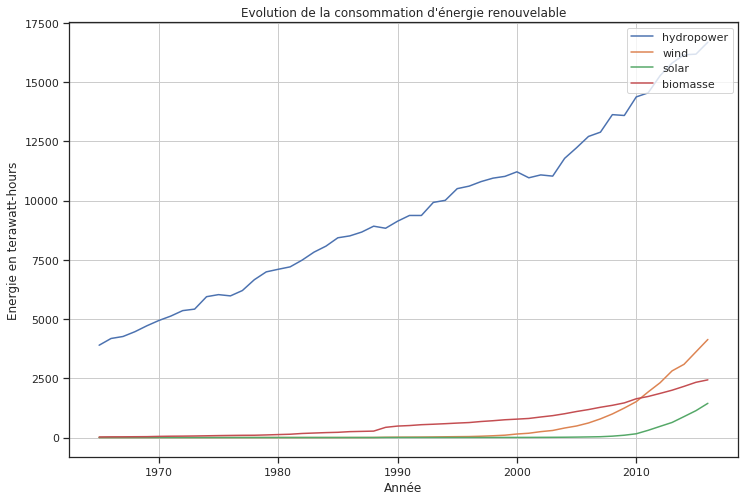

In [415]:
fig = plt.figure(figsize=(12, 8))
plt.plot(data_mrec_clean_year['hydropower'], label ='hydropower')
plt.plot(data_mrec_clean_year['wind'], label ='wind')
plt.plot(data_mrec_clean_year['solar'], label ='solar')
plt.plot(data_mrec_clean_year['biomasse'], label ='biomasse')
plt.legend(loc=1)
plt.title("Evolution de la consommation d'énergie renouvelable")
plt.xlabel("Année")
plt.ylabel("Energie en terawatt-hours")
plt.grid()
plt.show()

In [417]:
data_mrec_clean_ent = data_mrec_clean.groupby('Entity').sum()
data_mrec_clean_ent.head()

,Year,hydropower,wind,solar,biomasse
Entity,,,,,
Africa,103506,3245.039018,44.323466,12.445055,67.138104
Algeria,103506,15.668190,0.039052,0.405542,0.000000
Argentina,103506,1157.977798,3.427932,0.070649,34.720448
Asia Pacific,103506,27513.699990,1474.406482,389.898645,2008.413464
Australia,103506,728.659567,79.923937,28.572717,66.555294


In [342]:
data_rec_clean = group_by(data_rec, 'Code', 'Year')

In [343]:
data_rei_clean = group_by(data_rei, 'Code', 'Year')

In [344]:
data_iirebt_clean = group_by(data_iirebt,'Code', 'Year' )

In [373]:
data_rec_clean.tail()

biofuel  biomasse      wind   solar  hydropower
Code Year                                                 
ZAF  2012      0.0   0.29300  0.037000  0.0949         0.0
     2013      0.0   0.29800  0.037000  0.2430         0.0
     2014      0.0   0.30300  1.066000  1.1230         0.0
     2015      0.0   0.30300  3.071000  2.7490         0.0
     2016      0.0   0.30383  4.175852  3.2740         0.0

In [ ]:
data_rec_clean

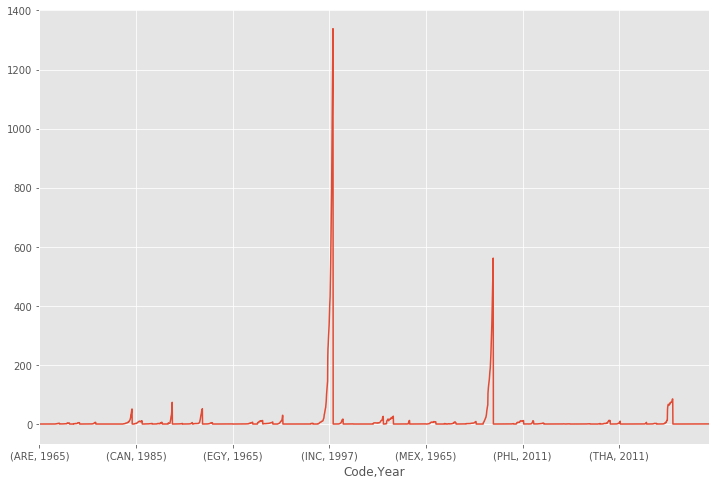

In [379]:
fig = plt.figure(figsize=(12, 8))
data_rec_clean['biomasse'].plot()
#data_rec_clean['biofuel'].plot()

Text(0, 0.5, 'GDP per capita')

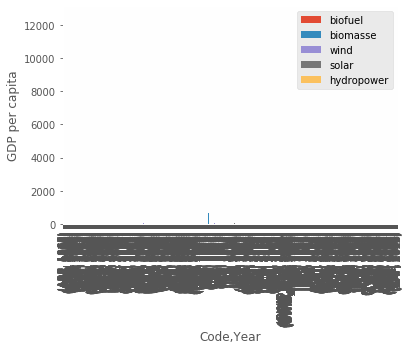

In [378]:
plt.style.use('ggplot')
data_rec_clean.plot(kind='bar')
plt.ylabel('GDP per capita')